<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/Employee_Turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Employee churn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')
warnings.simplefilter('ignore')

## Reading the data

In [25]:
df = pd.read_csv('/content/employee_data.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
df.shape

(11582, 10)

## Exploratory Data Analysis

In [10]:
pd.crosstab(df.salary,df.quit)

quit,0,1
salary,,
high,853,48
low,4401,1182
medium,4327,770


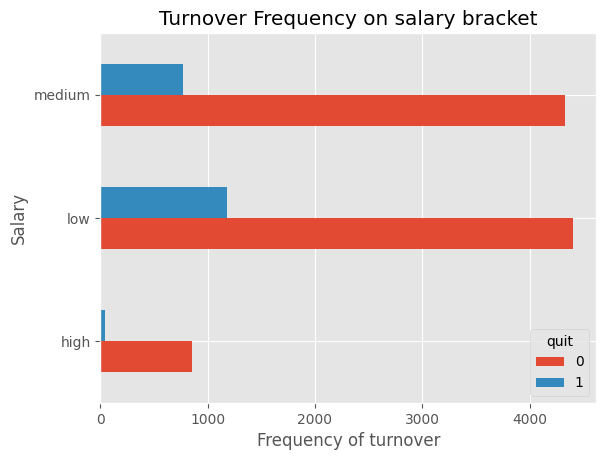

In [8]:
pd.crosstab(df.salary,df.quit).plot(kind='barh')
plt.title('Turnover Frequency on salary bracket')
plt.xlabel('Frequency of turnover')
plt.ylabel('Salary')
plt.show()

* **High earners are more likely to stay** - The "high" salary bracket shows minimal turnover, with most employees remaining in their positions (blue bar is very small).
* **Low and medium earners have similar turnover rates** - Both groups show substantial employee departures (large red bars), suggesting salary level alone doesn't explain the difference between these brackets.

In [9]:
df.department.value_counts()

,count
department,
sales,3092
technical,2227
support,1790
IT,935
RandD,689
product_mng,638
marketing,633
accounting,611
hr,601


In [11]:
pd.crosstab(df.department,df.quit)

quit,0,1
department,,
IT,776,159
RandD,603,86
accounting,501,110
hr,488,113
management,313,52
marketing,521,112
product_mng,528,110
sales,2536,556
support,1478,312


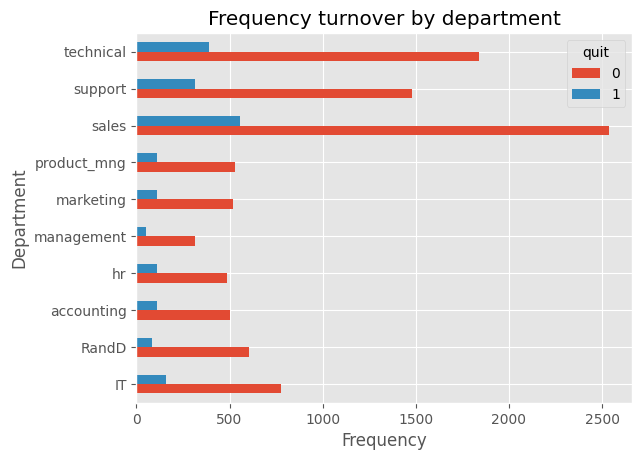

In [12]:
pd.crosstab(df.department,df.quit).plot(kind='barh')
plt.title('Frequency turnover by department')
plt.ylabel('Department')
plt.xlabel('Frequency')
plt.show()

* **Sales dominates turnover frequency** - Sales has by far the highest number of departures (~2,500), confirming it's the organization's biggest retention challenge.
* **Technical roles have surprisingly high turnover** - Despite typically being well-retained, technical shows the second-highest departure volume (~1,800).
*  Sales, technical, and support departments should be immediate priorities for retention initiatives, as they represent the bulk of organizational turnover costs.

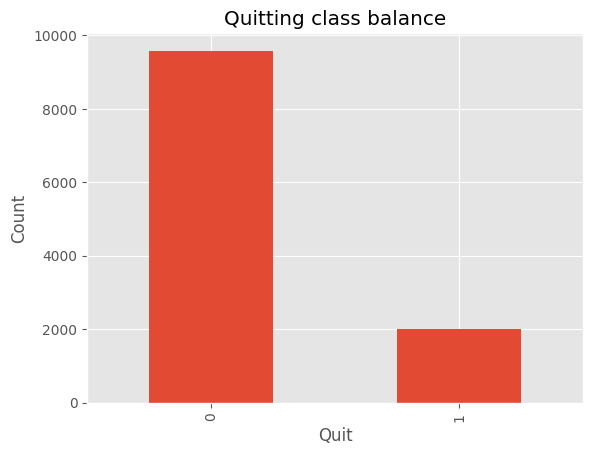

In [14]:
df['quit'].value_counts().plot(kind='bar')
plt.title('Quitting class balance')
plt.xlabel('Quit')
plt.ylabel('Count')
plt.show();

## Data preprocessing

* Encode categorical features
* Split data into train and test sets


**Encode categorical features**

In [26]:
cat_cols = ['department','salary']
for i in cat_cols:
  cat_df = pd.get_dummies(df[i],prefix=i,dtype='int')
  df = df.join(cat_df)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [27]:
df = df.drop(['department','salary'],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# Creates a boolean list to feed to df.loc[]
df.columns !='quit'

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Split the data into X and y**

In [40]:
X = df.loc[:,df.columns !='quit']
y = df['quit']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
len(X_train),len(X_test)

(9265, 2317)

In [43]:
# Inputing stratify = y gives the same ratio as the original dataset
pd.Series(y_train).value_counts()

,count
quit,
0,7665
1,1600
